In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn import preprocessing
from scipy import stats
from IPython.core.pylabtools import figsize
import xgboost as xgb
import matplotlib.pyplot as plt
%matplotlib inline

from os import path
to_filename = lambda name: path.join("..", "data", "allstate", name +".csv")

import seaborn as sns
sns.set_style("whitegrid")

In [5]:
train = pd.read_csv(to_filename("train"), index_col=0)
test = pd.read_csv(to_filename("test"), index_col=0)
print("shape: train {}, test {}".format(train.shape, test.shape))
print(train.head(2))

shape: train (188318, 131), test (125546, 130)
   cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9 cat10   ...        cont6  \
id                                                      ...                
1     A    B    A    B    A    A    A    A    B     A   ...     0.718367   
2     A    B    A    A    A    A    A    A    B     B   ...     0.438917   

       cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
id                                                                      
1   0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
2   0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   

      cont14     loss  
id                     
1   0.714843  2213.18  
2   0.304496  1283.60  

[2 rows x 131 columns]


In [6]:
# numerical features
num_features = [col for col in train.columns if col.startswith("cont")]
print("Numerical columns:", num_features)

('Numerical columns:', ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'])


In [7]:
response = np.log(train.loss)
response.name = "logloss"

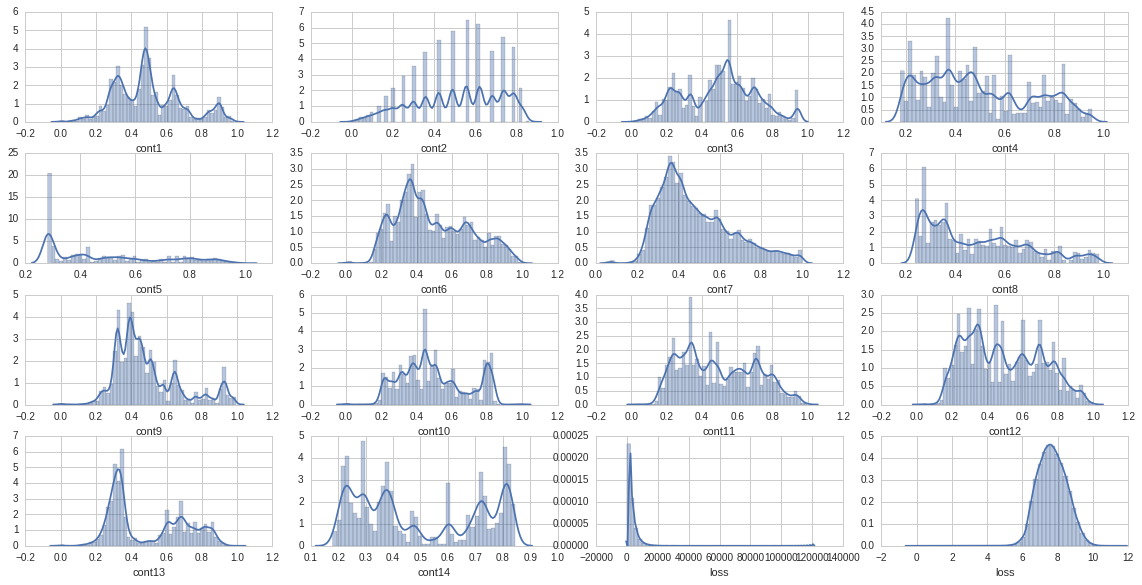

In [14]:
figsize(16, 8)
f, ax = plt.subplots(4, 4)
plt.tight_layout()
for i, col in enumerate(num_features):
    sns.distplot(train[col], ax=ax[i / 4][i % 4])
sns.distplot(train.loss, ax=ax[3][2])
sns.distplot(response, ax=ax[3][3])

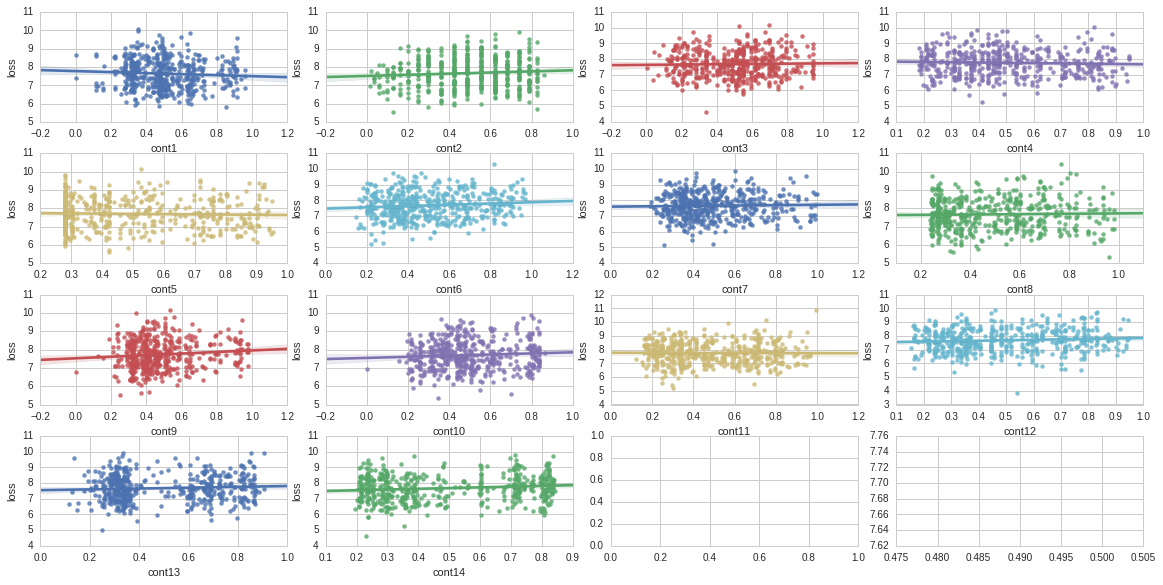

In [17]:
figsize(16, 8)
f, ax = plt.subplots(4, 4)
plt.tight_layout()
for i, col in enumerate(num_features):
    x = train[col].sample(500)
    sns.regplot(x, response[x.index], ax=ax[i / 4][i % 4])

In [2]:
stats.poisson?

In [8]:
train['cont2'].mean()

0.50718835617944102

In [9]:
train['cont2'].var()

0.042932560482929559